events charged
2025984
Boby
nb events 1 emutau = 91712
Boby
Boby
Boby
Boby
Boby
ratio of fake taus made with pT of taus
----NOW applying it to muon PT-------------
Boby
Boby
Boby
Boby
Boby
Boby
kolmogorov test: statistics = 0.1388888888888889 and pvalue = 0.8848803300554184
----NOW applying it to electron PT-------------
kolmogorov test: statistics = 0.1111111111111111 and pvalue = 0.9821553096666891
----NOW applying it to electron and muon delta R-------------
kolmogorov test: statistics = 0.1951219512195122 and pvalue = 0.42017824559389316


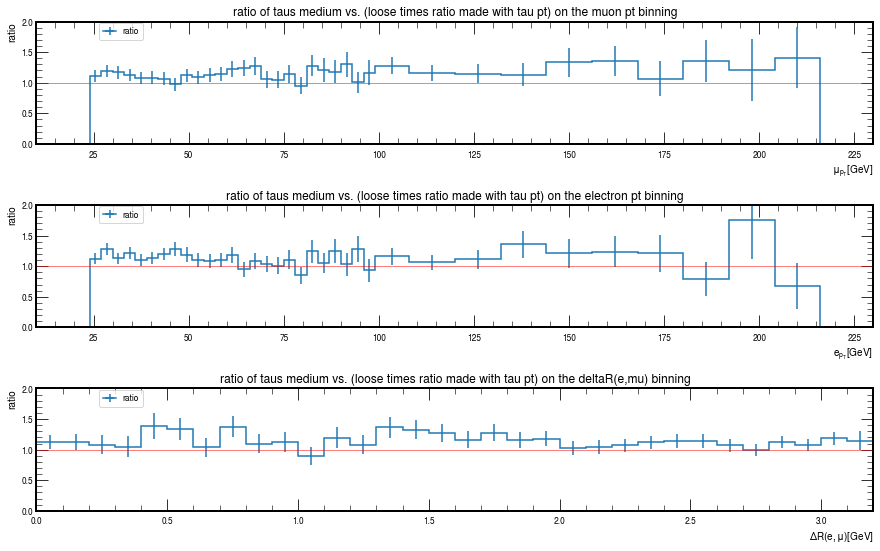

In [22]:
###FOR TTBAR BACKGROUND
####FOR EMU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import warnings
from scipy.stats import chisquare
from scipy.stats import ks_2samp
import os
plt.style.use([hep.style.ROOT])
%matplotlib inline
curr_os = os.name
#if(curr_os == "nt"):
#    local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"
#if(curr_os == "posix"):
#    local_dir = "/media/sf_PDM/data/backgrounds/tt2l2nu"
local_dir = "/eos/user/l/lmollier/PDM/data/bck/nanoAOD/tt2l2nu"
warnings.filterwarnings("ignore")
lumi = 60000. # pb-1
xsec = 87.315 #pb
scale = lumi * xsec
samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
print("events charged")
print(len(events))
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
print("Boby")
events = events[ak.num(events.SelMuon) == 1]
events = events[ak.num(events.SelElectron) == 1]
events = events[ak.num(events.SelTau) == 1]
print("nb events 1 emutau = " + str(len(events)))
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0
print("Boby")

CR_loose = events[one_bjet]
CR_medium = events[one_bjet]
CR_medium['SelTau'] = CR_medium.SelTau[CR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]

CR_loose = CR_loose[ak.num(CR_loose.SelTau) == 1]
CR_medium = CR_medium[ak.num(CR_medium.SelTau) == 1]

CR_loose_kin = ak.flatten(CR_loose.SelTau.pt)
CR_medium_kin = ak.flatten(CR_medium.SelTau.pt)
print("Boby")

bins_pt_tau = []
width = 3
for i in range(20,100):
    if((i) %width == 0):
        bins_pt_tau.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins_pt_tau.append(i)     

print("Boby")

#compute the error
(h_CR_loose,bins_CR_loose) = np.histogram(ak.to_numpy(CR_loose_kin), bins = bins_pt_tau)
(h_CR_medium,bins_CR_medium) = np.histogram(ak.to_numpy(CR_medium_kin), bins = bins_pt_tau)
error_CR_loose = np.sqrt(h_CR_loose)
error_CR_medium = np.sqrt(h_CR_medium)
temp1 = np.divide(error_CR_loose,h_CR_loose)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_CR_medium,h_CR_medium)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
h_ratio_CR_loose_med = np.divide(h_CR_loose,h_CR_medium)
h_ratio_CR_loose_med = np.nan_to_num(h_ratio_CR_loose_med, nan=0, posinf=0, neginf=0)
h_ratio_CR_loose_med_for_error = h_ratio_CR_loose_med
error_ratio_CR_loose_med = np.multiply(temp,h_ratio_CR_loose_med)
print("Boby")

#compute the ratio 
(h_CR_loose,bins_CR_loose) = np.histogram(ak.to_numpy(CR_loose_kin), bins = bins_pt_tau, weights = ak.to_numpy(CR_loose.genWeight * scale))
(h_CR_medium,bins_CR_medium) = np.histogram(ak.to_numpy(CR_medium_kin), bins = bins_pt_tau, weights = ak.to_numpy(CR_medium.genWeight * scale))
h_ratio_CR_loose_med = np.divide(h_CR_loose,h_CR_medium)
h_ratio_CR_loose_med = np.nan_to_num(h_ratio_CR_loose_med, nan=0, posinf=0, neginf=0)

print("Boby")


print("ratio of fake taus made with pT of taus")

print("----NOW applying it to muon PT-------------")

SR_loose = events[no_bjet]
SR_medium = events[no_bjet]
SR_medium['SelTau'] = SR_medium.SelTau[SR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]
SR_loose = SR_loose[ak.num(SR_loose.SelTau) == 1]
SR_medium = SR_medium[ak.num(SR_medium.SelTau) == 1]
SR_loose_kin = ak.flatten(SR_loose.SelMuon.pt)
SR_medium_kin = ak.flatten(SR_medium.SelMuon.pt)
SR_var1_loose_kin = ak.flatten(SR_loose.SelTau.pt)
print("Boby")

bins_pt_muon = []
width = 3
for i in range(20,100):
    if((i) %width == 0):
        bins_pt_muon.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins_pt_muon.append(i)    
print("Boby")



#compute the error
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_muon, bins_pt_tau])
h = h[0]
h_sqrt = np.sqrt(h) 
h_error_temp = (h_sqrt/h)**2
h_error_temp = np.nan_to_num(h_error_temp, nan=0, posinf=0, neginf=0)
h_ratio_error_temp = (error_ratio_CR_loose_med/h_ratio_CR_loose_med_for_error)**2
h_ratio_error_temp = np.nan_to_num(h_ratio_error_temp, nan=0, posinf=0, neginf=0)
temp = np.sqrt(h_ratio_error_temp+h_error_temp)
h_error = np.copy(h)
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med_for_error[j]
        h_error[i][j] = temp[i][j]*h[i][j]
h_SR_loose_to_med = np.sum(h, axis = 1)
h_SR_loose_to_med_for_error = h_SR_loose_to_med
h_error = h_error**2
error_SR_loose_to_med = np.sqrt(np.sum(h_error, axis = 1))
print("Boby")

#compute the histogram scaled
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_muon, bins_pt_tau], weights=ak.to_numpy(SR_loose.genWeight* scale))
h = h[0]
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med[j]
h_SR_loose_to_med = np.sum(h, axis = 1)



print("Boby")



#compute the error
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_muon)
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med_for_error)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)
error_SR_medium = np.sqrt(h_SR_medium)
temp1 = (error_SR_loose_to_med/h_SR_loose_to_med_for_error)**2
temp2 = (error_SR_medium/h_SR_medium)**2
temp = np.sqrt(temp1 + temp2)
error_ratio_SR_kin = temp * ratio_SR_kin
print("Boby")

#compute the histogram with scaling
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_muon, weights = ak.to_numpy(SR_medium.genWeight* scale))
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)

print("Boby")


# chi2_muon_pt = chisquare(h_SR_loose_to_med, f_exp=h_SR_medium)
# print("chi square test : " + str(chi2_muon_pt))
(kt_s, kt_p) =ks_2samp(h_SR_loose_to_med, h_SR_medium)
print("kolmogorov test: statistics = " + str(kt_s) + " and pvalue = " + str(kt_p))
nb_row = 3
width = 15
plot_iter = 1
height = nb_row*3
plt.figure(figsize=(width, height))
ax = plt.subplot(nb_row,1,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.5)

hep.histplot(ratio_SR_kin, bins_pt_muon, yerr = error_ratio_SR_kin, label = 'ratio')
plt.axhline(y=1, color='r', linestyle='-', linewidth = 0.5)

ax.legend(loc=(0.075,0.85),frameon=True)
ax.set_ylabel("ratio")
ax.set_xlabel(r"$\mu_{p_T}$[GeV]")
ax.set_title(r"ratio of taus medium vs. (loose times ratio made with tau pt) on the muon pt binning")
ax.set_ylim([0, 2])
ax.set_xlim([10, 230])




print("----NOW applying it to electron PT-------------")

SR_loose = events[no_bjet]
SR_medium = events[no_bjet]
SR_medium['SelTau'] = SR_medium.SelTau[SR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]
SR_loose = SR_loose[ak.num(SR_loose.SelTau) == 1]
SR_medium = SR_medium[ak.num(SR_medium.SelTau) == 1]

SR_loose_kin = ak.flatten(SR_loose.SelElectron.pt)
SR_medium_kin = ak.flatten(SR_medium.SelElectron.pt)
SR_var1_loose_kin = ak.flatten(SR_loose.SelTau.pt)

bins_pt_var_now = []
width = 3
for i in range(20,100):
    if((i) %width == 0):
        bins_pt_var_now.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins_pt_var_now.append(i)    


#compute the error
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_var_now, bins_pt_tau])
h = h[0]
h_sqrt = np.sqrt(h) 
h_error_temp = (h_sqrt/h)**2
h_error_temp = np.nan_to_num(h_error_temp, nan=0, posinf=0, neginf=0)
h_ratio_error_temp = (error_ratio_CR_loose_med/h_ratio_CR_loose_med_for_error)**2
h_ratio_error_temp = np.nan_to_num(h_ratio_error_temp, nan=0, posinf=0, neginf=0)
temp = np.sqrt(h_ratio_error_temp+h_error_temp)
h_error = np.copy(h)
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med_for_error[j]
        h_error[i][j] = temp[i][j]*h[i][j]
h_SR_loose_to_med = np.sum(h, axis = 1)
h_SR_loose_to_med_for_error = h_SR_loose_to_med
h_error = h_error**2
error_SR_loose_to_med = np.sqrt(np.sum(h_error, axis = 1))

#compute the histogram scaled
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_var_now, bins_pt_tau], weights=ak.to_numpy(SR_loose.genWeight* scale))
h = h[0]
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med[j]
h_SR_loose_to_med = np.sum(h, axis = 1)


#compute the error
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_var_now)
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med_for_error)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)
error_SR_medium = np.sqrt(h_SR_medium)
temp1 = (error_SR_loose_to_med/h_SR_loose_to_med_for_error)**2
temp2 = (error_SR_medium/h_SR_medium)**2
temp = np.sqrt(temp1 + temp2)
error_ratio_SR_kin = temp * ratio_SR_kin

#compute the histogram with scaling
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_var_now, weights = ak.to_numpy(SR_medium.genWeight* scale))
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)


(kt_s, kt_p) =ks_2samp(h_SR_loose_to_med, h_SR_medium)
print("kolmogorov test: statistics = " + str(kt_s) + " and pvalue = " + str(kt_p))

ax = plt.subplot(nb_row,1,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.5)
hep.histplot(ratio_SR_kin, bins_pt_var_now, yerr = error_ratio_SR_kin, label = 'ratio')
plt.axhline(y=1, color='r', linestyle='-', linewidth = 0.5)

ax.legend(loc=(0.075,0.85),frameon=True)
ax.set_ylabel("ratio")
ax.set_xlabel(r"$e_{p_T}$[GeV]")
ax.set_title(r"ratio of taus medium vs. (loose times ratio made with tau pt) on the electron pt binning")
ax.set_ylim([0, 2])
ax.set_xlim([10, 230])



print("----NOW applying it to electron and muon delta R-------------")

SR_loose = events[no_bjet]
SR_medium = events[no_bjet]
SR_medium['SelTau'] = SR_medium.SelTau[SR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]
SR_loose = SR_loose[ak.num(SR_loose.SelTau) == 1]
SR_medium = SR_medium[ak.num(SR_medium.SelTau) == 1]

SR_loose_kin = delta_r(SR_loose.SelElectron[:,0],SR_loose.SelMuon[:,0])  % np.pi
SR_medium_kin = delta_r(SR_medium.SelElectron[:,0],SR_medium.SelMuon[:,0])  % np.pi
SR_var1_loose_kin = ak.flatten(SR_loose.SelTau.pt)

bins_var_now = []
width = 1
for i in range(0,int(42/width)):
        bins_var_now.append(width*i/10)



#compute the error
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_var_now, bins_pt_tau])
h = h[0]
h_sqrt = np.sqrt(h) 
h_error_temp = (h_sqrt/h)**2
h_error_temp = np.nan_to_num(h_error_temp, nan=0, posinf=0, neginf=0)
h_ratio_error_temp = (error_ratio_CR_loose_med/h_ratio_CR_loose_med_for_error)**2
h_ratio_error_temp = np.nan_to_num(h_ratio_error_temp, nan=0, posinf=0, neginf=0)
temp = np.sqrt(h_ratio_error_temp+h_error_temp)
h_error = np.copy(h)
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med_for_error[j]
        h_error[i][j] = temp[i][j]*h[i][j]
h_SR_loose_to_med = np.sum(h, axis = 1)
h_SR_loose_to_med_for_error = h_SR_loose_to_med
h_error = h_error**2
error_SR_loose_to_med = np.sqrt(np.sum(h_error, axis = 1))

#compute the histogram scaled
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_var_now, bins_pt_tau], weights=ak.to_numpy(SR_loose.genWeight* scale))
h = h[0]
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med[j]
h_SR_loose_to_med = np.sum(h, axis = 1)






#compute the error
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_var_now)
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med_for_error)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)
error_SR_medium = np.sqrt(h_SR_medium)
temp1 = (error_SR_loose_to_med/h_SR_loose_to_med_for_error)**2
temp2 = (error_SR_medium/h_SR_medium)**2
temp = np.sqrt(temp1 + temp2)
error_ratio_SR_kin = temp * ratio_SR_kin

#compute the histogram with scaling
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_var_now, weights = ak.to_numpy(SR_medium.genWeight* scale))
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)


(kt_s, kt_p) =ks_2samp(h_SR_loose_to_med, h_SR_medium)
print("kolmogorov test: statistics = " + str(kt_s) + " and pvalue = " + str(kt_p))


ax = plt.subplot(nb_row,1,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.5)
hep.histplot(ratio_SR_kin, bins_var_now, yerr = error_ratio_SR_kin, label = 'ratio')
plt.axhline(y=1, color='r', linestyle='-', linewidth = 0.5)
ax.legend(loc=(0.075,0.85),frameon=True)
ax.set_ylabel("ratio")
ax.set_xlabel(r"$\Delta R(e,\mu)$[GeV]")
ax.set_title(r"ratio of taus medium vs. (loose times ratio made with tau pt) on the deltaR(e,mu) binning")
ax.set_ylim([0, 2])
ax.set_xlim([0,3.2])
plt.savefig("fake_rates_ttbar_testnewbck.pdf")
plt.show()

warnings.filterwarnings("default")



In [ ]:
###FOR TTBAR BACKGROUND
####FOR EMU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import warnings
from scipy.stats import chisquare
from scipy.stats import ks_2samp
import os
plt.style.use([hep.style.ROOT])
%matplotlib inline
curr_os = os.name
#if(curr_os == "nt"):
#    local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"
#if(curr_os == "posix"):
#    local_dir = "/media/sf_PDM/data/backgrounds/tt2l2nu"
local_dir = "/eos/user/l/lmollier/PDM/data/bck/nanoAOD/TTZ_To_LLNuNu"
warnings.filterwarnings("ignore")
lumi = 60000. # pb-1
xsec = 87.315 #pb
scale = lumi * xsec
samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][3]
print(file)
nb_events = 1025984
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
print("events charged")
nb_events_before = len(events)
print("nb events = " + str(len(events)))

events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
events = events[ak.num(events.SelMuon) == 1]
events = events[ak.num(events.SelElectron) == 1]
events = events[ak.num(events.SelTau) == 1]
print("nb events 1 emutau = " + str(len(events)))
print("percentage kept = " + str(100*len(events)/nb_events_before))
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0

CR_loose = events[one_bjet]
CR_medium = events[one_bjet]
CR_medium['SelTau'] = CR_medium.SelTau[CR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]

CR_loose = CR_loose[ak.num(CR_loose.SelTau) == 1]
CR_medium = CR_medium[ak.num(CR_medium.SelTau) == 1]
print("nb events CR loose = " + str(len(CR_loose)))
print("nb events CR medium = " + str(len(CR_medium)))

CR_loose_kin = ak.flatten(CR_loose.SelTau.pt)
CR_medium_kin = ak.flatten(CR_medium.SelTau.pt)

bins_pt_tau = []
width = 3
for i in range(20,100):
    if((i) %width == 0):
        bins_pt_tau.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins_pt_tau.append(i)     


#compute the error
(h_CR_loose,bins_CR_loose) = np.histogram(ak.to_numpy(CR_loose_kin), bins = bins_pt_tau)
(h_CR_medium,bins_CR_medium) = np.histogram(ak.to_numpy(CR_medium_kin), bins = bins_pt_tau)
error_CR_loose = np.sqrt(h_CR_loose)
error_CR_medium = np.sqrt(h_CR_medium)
temp1 = np.divide(error_CR_loose,h_CR_loose)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_CR_medium,h_CR_medium)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
h_ratio_CR_loose_med = np.divide(h_CR_loose,h_CR_medium)
h_ratio_CR_loose_med = np.nan_to_num(h_ratio_CR_loose_med, nan=0, posinf=0, neginf=0)
h_ratio_CR_loose_med_for_error = h_ratio_CR_loose_med
error_ratio_CR_loose_med = np.multiply(temp,h_ratio_CR_loose_med)

#compute the ratio 
(h_CR_loose,bins_CR_loose) = np.histogram(ak.to_numpy(CR_loose_kin), bins = bins_pt_tau, weights = ak.to_numpy(CR_loose.genWeight * scale))
(h_CR_medium,bins_CR_medium) = np.histogram(ak.to_numpy(CR_medium_kin), bins = bins_pt_tau, weights = ak.to_numpy(CR_medium.genWeight * scale))
h_ratio_CR_loose_med = np.divide(h_CR_loose,h_CR_medium)
h_ratio_CR_loose_med = np.nan_to_num(h_ratio_CR_loose_med, nan=0, posinf=0, neginf=0)



print("ratio of fake taus made with pT of taus")

print("----NOW applying it to muon PT-------------")

SR_loose = events[no_bjet]
SR_medium = events[no_bjet]
SR_medium['SelTau'] = SR_medium.SelTau[SR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]
SR_loose = SR_loose[ak.num(SR_loose.SelTau) == 1]
SR_medium = SR_medium[ak.num(SR_medium.SelTau) == 1]
SR_loose_kin = ak.flatten(SR_loose.SelMuon.pt)
SR_medium_kin = ak.flatten(SR_medium.SelMuon.pt)
SR_var1_loose_kin = ak.flatten(SR_loose.SelTau.pt)

bins_pt_muon = []
width = 3
for i in range(20,100):
    if((i) %width == 0):
        bins_pt_muon.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins_pt_muon.append(i)    



#compute the error
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_muon, bins_pt_tau])
h = h[0]
h_sqrt = np.sqrt(h) 
h_error_temp = (h_sqrt/h)**2
h_error_temp = np.nan_to_num(h_error_temp, nan=0, posinf=0, neginf=0)
h_ratio_error_temp = (error_ratio_CR_loose_med/h_ratio_CR_loose_med_for_error)**2
h_ratio_error_temp = np.nan_to_num(h_ratio_error_temp, nan=0, posinf=0, neginf=0)
temp = np.sqrt(h_ratio_error_temp+h_error_temp)
h_error = np.copy(h)
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med_for_error[j]
        h_error[i][j] = temp[i][j]*h[i][j]
h_SR_loose_to_med = np.sum(h, axis = 1)
h_SR_loose_to_med_for_error = h_SR_loose_to_med
h_error = h_error**2
error_SR_loose_to_med = np.sqrt(np.sum(h_error, axis = 1))

#compute the histogram scaled
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_muon, bins_pt_tau], weights=ak.to_numpy(SR_loose.genWeight* scale))
h = h[0]
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med[j]
h_SR_loose_to_med = np.sum(h, axis = 1)






#compute the error
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_muon)
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med_for_error)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)
error_SR_medium = np.sqrt(h_SR_medium)
temp1 = (error_SR_loose_to_med/h_SR_loose_to_med_for_error)**2
temp2 = (error_SR_medium/h_SR_medium)**2
temp = np.sqrt(temp1 + temp2)
error_ratio_SR_kin = temp * ratio_SR_kin

#compute the histogram with scaling
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_muon, weights = ak.to_numpy(SR_medium.genWeight* scale))
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)



# chi2_muon_pt = chisquare(h_SR_loose_to_med, f_exp=h_SR_medium)
# print("chi square test : " + str(chi2_muon_pt))
(kt_s, kt_p) =ks_2samp(h_SR_loose_to_med, h_SR_medium)
print("kolmogorov test: statistics = " + str(kt_s) + " and pvalue = " + str(kt_p))
nb_row = 3
width = 15
plot_iter = 1
height = nb_row*3
plt.figure(figsize=(width, height))
ax = plt.subplot(nb_row,1,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.5)

hep.histplot(ratio_SR_kin, bins_pt_muon, yerr = error_ratio_SR_kin, label = 'ratio')
plt.axhline(y=1, color='r', linestyle='-', linewidth = 0.5)

ax.legend(loc=(0.075,0.85),frameon=True)
ax.set_ylabel("ratio")
ax.set_xlabel(r"$\mu_{p_T}$[GeV]")
ax.set_title(r"ratio of taus medium vs. (loose times ratio made with tau pt) on the muon pt binning")
#ax.set_ylim([0, 2])
ax.set_xlim([10, 230])




print("----NOW applying it to electron PT-------------")

SR_loose = events[no_bjet]
SR_medium = events[no_bjet]
SR_medium['SelTau'] = SR_medium.SelTau[SR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]
SR_loose = SR_loose[ak.num(SR_loose.SelTau) == 1]
SR_medium = SR_medium[ak.num(SR_medium.SelTau) == 1]

SR_loose_kin = ak.flatten(SR_loose.SelElectron.pt)
SR_medium_kin = ak.flatten(SR_medium.SelElectron.pt)
SR_var1_loose_kin = ak.flatten(SR_loose.SelTau.pt)

bins_pt_var_now = []
width = 3
for i in range(20,100):
    if((i) %width == 0):
        bins_pt_var_now.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins_pt_var_now.append(i)    


#compute the error
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_var_now, bins_pt_tau])
h = h[0]
h_sqrt = np.sqrt(h) 
h_error_temp = (h_sqrt/h)**2
h_error_temp = np.nan_to_num(h_error_temp, nan=0, posinf=0, neginf=0)
h_ratio_error_temp = (error_ratio_CR_loose_med/h_ratio_CR_loose_med_for_error)**2
h_ratio_error_temp = np.nan_to_num(h_ratio_error_temp, nan=0, posinf=0, neginf=0)
temp = np.sqrt(h_ratio_error_temp+h_error_temp)
h_error = np.copy(h)
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med_for_error[j]
        h_error[i][j] = temp[i][j]*h[i][j]
h_SR_loose_to_med = np.sum(h, axis = 1)
h_SR_loose_to_med_for_error = h_SR_loose_to_med
h_error = h_error**2
error_SR_loose_to_med = np.sqrt(np.sum(h_error, axis = 1))

#compute the histogram scaled
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_pt_var_now, bins_pt_tau], weights=ak.to_numpy(SR_loose.genWeight* scale))
h = h[0]
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med[j]
h_SR_loose_to_med = np.sum(h, axis = 1)


#compute the error
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_var_now)
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med_for_error)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)
error_SR_medium = np.sqrt(h_SR_medium)
temp1 = (error_SR_loose_to_med/h_SR_loose_to_med_for_error)**2
temp2 = (error_SR_medium/h_SR_medium)**2
temp = np.sqrt(temp1 + temp2)
error_ratio_SR_kin = temp * ratio_SR_kin

#compute the histogram with scaling
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_pt_var_now, weights = ak.to_numpy(SR_medium.genWeight* scale))
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)


(kt_s, kt_p) =ks_2samp(h_SR_loose_to_med, h_SR_medium)
print("kolmogorov test: statistics = " + str(kt_s) + " and pvalue = " + str(kt_p))

ax = plt.subplot(nb_row,1,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.5)
hep.histplot(ratio_SR_kin, bins_pt_var_now, yerr = error_ratio_SR_kin, label = 'ratio')
plt.axhline(y=1, color='r', linestyle='-', linewidth = 0.5)

ax.legend(loc=(0.075,0.85),frameon=True)
ax.set_ylabel("ratio")
ax.set_xlabel(r"$e_{p_T}$[GeV]")
ax.set_title(r"ratio of taus medium vs. (loose times ratio made with tau pt) on the electron pt binning")
#ax.set_ylim([0, 2])
ax.set_xlim([10, 230])



print("----NOW applying it to electron and muon delta R-------------")

SR_loose = events[no_bjet]
SR_medium = events[no_bjet]
SR_medium['SelTau'] = SR_medium.SelTau[SR_medium.SelTau.idDeepTau2017v2p1VSjet >=63]
SR_loose = SR_loose[ak.num(SR_loose.SelTau) == 1]
SR_medium = SR_medium[ak.num(SR_medium.SelTau) == 1]

SR_loose_kin = delta_r(SR_loose.SelElectron[:,0],SR_loose.SelMuon[:,0])  % np.pi
SR_medium_kin = delta_r(SR_medium.SelElectron[:,0],SR_medium.SelMuon[:,0])  % np.pi
SR_var1_loose_kin = ak.flatten(SR_loose.SelTau.pt)

bins_var_now = []
width = 1
for i in range(0,int(42/width)):
        bins_var_now.append(width*i/10)



#compute the error
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_var_now, bins_pt_tau])
h = h[0]
h_sqrt = np.sqrt(h) 
h_error_temp = (h_sqrt/h)**2
h_error_temp = np.nan_to_num(h_error_temp, nan=0, posinf=0, neginf=0)
h_ratio_error_temp = (error_ratio_CR_loose_med/h_ratio_CR_loose_med_for_error)**2
h_ratio_error_temp = np.nan_to_num(h_ratio_error_temp, nan=0, posinf=0, neginf=0)
temp = np.sqrt(h_ratio_error_temp+h_error_temp)
h_error = np.copy(h)
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med_for_error[j]
        h_error[i][j] = temp[i][j]*h[i][j]
h_SR_loose_to_med = np.sum(h, axis = 1)
h_SR_loose_to_med_for_error = h_SR_loose_to_med
h_error = h_error**2
error_SR_loose_to_med = np.sqrt(np.sum(h_error, axis = 1))

#compute the histogram scaled
h = np.histogram2d(ak.to_numpy(SR_loose_kin),ak.to_numpy(SR_var1_loose_kin), bins = [bins_var_now, bins_pt_tau], weights=ak.to_numpy(SR_loose.genWeight* scale))
h = h[0]
for i in range(0, len(h)):
    for j in range(0, len(h[i])):
        h[i][j] = h[i][j] / h_ratio_CR_loose_med[j]
h_SR_loose_to_med = np.sum(h, axis = 1)






#compute the error
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_var_now)
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med_for_error)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)
error_SR_medium = np.sqrt(h_SR_medium)
temp1 = (error_SR_loose_to_med/h_SR_loose_to_med_for_error)**2
temp2 = (error_SR_medium/h_SR_medium)**2
temp = np.sqrt(temp1 + temp2)
error_ratio_SR_kin = temp * ratio_SR_kin

#compute the histogram with scaling
(h_SR_medium,bins_SR_medium) = np.histogram(ak.to_numpy(SR_medium_kin), bins = bins_var_now, weights = ak.to_numpy(SR_medium.genWeight* scale))
ratio_SR_kin = np.divide(h_SR_medium, h_SR_loose_to_med)
ratio_SR_kin = np.nan_to_num(ratio_SR_kin, nan=0, posinf=0, neginf=0)


(kt_s, kt_p) =ks_2samp(h_SR_loose_to_med, h_SR_medium)
print("kolmogorov test: statistics = " + str(kt_s) + " and pvalue = " + str(kt_p))


ax = plt.subplot(nb_row,1,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.5)
hep.histplot(ratio_SR_kin, bins_var_now, yerr = error_ratio_SR_kin, label = 'ratio')
plt.axhline(y=1, color='r', linestyle='-', linewidth = 0.5)
ax.legend(loc=(0.075,0.85),frameon=True)
ax.set_ylabel("ratio")
ax.set_xlabel(r"$\Delta R(e,\mu)$[GeV]")
ax.set_title(r"ratio of taus medium vs. (loose times ratio made with tau pt) on the deltaR(e,mu) binning")
#ax.set_ylim([0, 2])
ax.set_xlim([0,3.2])
plt.savefig("fake_rates_ttbar_testnewbck.pdf")
plt.show()

warnings.filterwarnings("default")



/eos/user/l/lmollier/PDM/data/bck/nanoAOD/TTZ_To_LLNuNu/TTZ_To_LLNuNu_split-14.root
events charged
nb events = 990000
